In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
######## Импортируем csv-файлы

logs = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 4. Маркетинг и вебинары/logs.csv', sep=';')
clients = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 4. Маркетинг и вебинары/clients.csv', sep=';')
vk_reg = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 4. Маркетинг и вебинары/vk_reg.csv', sep=';')
tg_reg = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 4. Маркетинг и вебинары/tg_reg.csv', sep=';')
inst_reg = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 4. Маркетинг и вебинары/inst_reg.csv', sep=';')
fb_reg = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 4. Маркетинг и вебинары/fb_reg.csv', sep=';')
email_reg = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 4. Маркетинг и вебинары/email_reg.csv', sep=';')

In [3]:
######## Приводим к типу данных 

logs['t_left'] = pd.to_datetime(logs['t_left'])
logs['t_came'] = pd.to_datetime(logs['t_came'])

In [4]:
######## Группируем и проставляем лейблы для различных источников привлечения

tg_reg_gr = tg_reg.groupby('public_label').count()['time_reg'].reset_index()
tg_reg_gr['label'] = 'telegram'
tg_reg_gr['source_fin'] = tg_reg_gr['label'] + "_" + tg_reg_gr['public_label']

inst_reg_gr = inst_reg.groupby('blogger_label').count()['time_reg'].reset_index()
inst_reg_gr['label'] = 'instagram'
inst_reg_gr['source_fin'] = inst_reg_gr['label'] + "_" + inst_reg_gr['blogger_label']

fb_reg_gr = fb_reg.groupby('source_label').count()['time_reg'].reset_index()
fb_reg_gr['label'] = 'facebook'
fb_reg_gr['source_fin'] = fb_reg_gr['label'] + "_" + fb_reg_gr['source_label']

email_reg_gr = email_reg.groupby('domain_label').count()['time_reg'].reset_index()
email_reg_gr['label'] = 'email'
email_reg_gr['source_fin'] = email_reg_gr['label'] + "_" + email_reg_gr['domain_label']

vk_reg_gr = vk_reg.groupby('group_label').count()['time_reg'].reset_index()
vk_reg_gr['label'] = 'vkontakte'
vk_reg_gr['source_fin'] = vk_reg_gr['label'] + "_" + vk_reg_gr['group_label']

In [5]:
######## UNION агрегаций каналов привлечения

reg_agg = pd.concat([tg_reg_gr,inst_reg_gr,fb_reg_gr,email_reg_gr,vk_reg_gr])[['label','source_fin','time_reg']]

In [6]:
######## парсим поле source

clients['source_mjr'] = clients['source'].str.split('=').str[1].str.split('%').str[0]
clients['source_mnr'] = clients['source'].str.split('=').str[2].str.split('%').str[0].str[:-1]

clients['source_fin'] = clients['source_mjr'] + "_" + clients['source_mnr']

In [7]:
clients_gr = clients.groupby('source_fin').count()['id_user'].reset_index()

In [8]:
df = clients_gr.merge(reg_agg, on = 'source_fin')

df = df.rename(columns = {'id_user':'cnt_come', 'time_reg':'cnt_reg'})[['label','source_fin','cnt_reg','cnt_come']]
df['reg2come'] = df['cnt_come'] / df['cnt_reg']

In [9]:
df

,label,source_fin,cnt_reg,cnt_come,reg2come
0,email,email_gmail,1170,65,0.055556
1,email,email_outlook,1000,39,0.039000
2,email,email_yandex,958,80,0.083507
3,facebook,facebook_source1,671,47,0.070045
4,facebook,facebook_source2,1028,100,0.097276
5,facebook,facebook_source3,964,91,0.094398
6,instagram,instagram_blogger1,1611,157,0.097455
7,instagram,instagram_blogger2,841,90,0.107015
8,instagram,instagram_blogger3,743,75,0.100942
9,instagram,instagram_blogger4,2060,67,0.032524


In [10]:
######## Исследуем время входа и выхода с вебинара

logs['length'] = logs['t_left'] - logs['t_came']

logs_dyn_exit = logs.groupby('t_left').count()['id_user'].reset_index()
logs_dyn_entr = logs.groupby('t_came').count()['id_user'].reset_index()

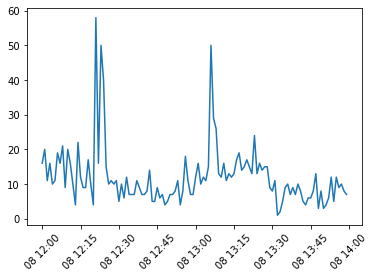

In [11]:
plt.plot(logs_dyn_exit['t_left'], logs_dyn_exit['id_user'])
plt.xticks(rotation = 45)
plt.show()

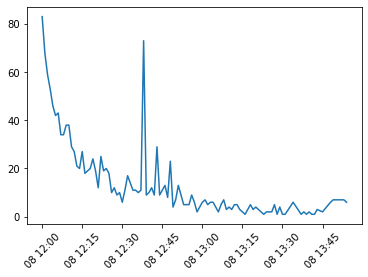

In [12]:
plt.plot(logs_dyn_entr['t_came'], logs_dyn_entr['id_user'])
plt.xticks(rotation = 45)
plt.show()